# Data I/O and plotting in more detail

## Native python read/write

First we are going to use the native python read/write methods to open files. These are good if you have text files with  strings that you want to read out. You should normally not use those if you have measurement data that is structured in a useful way. 

### Reading in files

Giving the option `'r'` when opening a file will open it in read mode. You cannot modify it, only look at the contents. 
There are different options on how to read the content of the file, the most common ones are`.read()` and `.realines()`.

In [1]:
## reading the whole text ##
with open('data/monty-python.txt', 'r') as f:
    content = f.read()

In [2]:
print(content)

LAUNCELOT:  We have the Holy Hand Grenade.
ARTHUR:  Yes, of course!  The Holy Hand Grenade of Antioch!  'Tis one
   of the sacred relics Brother Maynard carries with him!  Brother Maynard!
   Bring up the Holy Hand Grenade!
   [singing]
   How does it, uh... how does it work?
KNIGHT:  I know not, my liege.
ARTHUR:  Consult the Book of Armaments!
MAYNARD:  Armaments, Chapter Two, Verses Nine to Twenty-One.
BROTHER:  "And Saint Atila raised the hand grenade up on high, saying,
   'Oh, Lord, bless this thy hand grenade that with it thou mayest blow
   thy enemies to tiny bits, in thy mercy.'  And the Lord did grin, and
   people did feast upon the lambs, and sloths, and carp, and anchovies,
   and orangutans, and breakfast cereals, and fruit bats, and large --"
MAYNARD:  Skip a bit, Brother.
BROTHER:  "And the Lord spake, saying, 'First shalt thou take out the
   Holy Pin.  Then, shalt thou count to three, no more, no less.  Three
   shalt be the number thou shalt count, and the number of

In [3]:
## reading in seperate lines as a list ##
with open('data/monty-python.txt', 'r') as f:
    content = f.readlines()

In [4]:
content

['LAUNCELOT:  We have the Holy Hand Grenade.\n',
 "ARTHUR:  Yes, of course!  The Holy Hand Grenade of Antioch!  'Tis one\n",
 '   of the sacred relics Brother Maynard carries with him!  Brother Maynard!\n',
 '   Bring up the Holy Hand Grenade!\n',
 '   [singing]\n',
 '   How does it, uh... how does it work?\n',
 'KNIGHT:  I know not, my liege.\n',
 'ARTHUR:  Consult the Book of Armaments!\n',
 'MAYNARD:  Armaments, Chapter Two, Verses Nine to Twenty-One.\n',
 'BROTHER:  "And Saint Atila raised the hand grenade up on high, saying,\n',
 "   'Oh, Lord, bless this thy hand grenade that with it thou mayest blow\n",
 "   thy enemies to tiny bits, in thy mercy.'  And the Lord did grin, and\n",
 '   people did feast upon the lambs, and sloths, and carp, and anchovies,\n',
 '   and orangutans, and breakfast cereals, and fruit bats, and large --"\n',
 'MAYNARD:  Skip a bit, Brother.\n',
 'BROTHER:  "And the Lord spake, saying, \'First shalt thou take out the\n',
 '   Holy Pin.  Then, shalt thou 

In [5]:
# as with any list you can then pick out single lines by indexing #

content[2]

'   of the sacred relics Brother Maynard carries with him!  Brother Maynard!\n'

### Writing files 

The same content but with the option `'w'` for write (replaces the file if it does exist already) or `'a'` for append (adds a line to existing file) let you write files.

In [6]:
# creates or opens a file and writes a few lines #
with open('my_haiku.txt','w') as f:
    f.write('This is a haiku\nThough it has a correct form\nIt is still not good')

In [7]:
# check the file contents by reading it in like above #
with open('my_haiku.txt','r') as f:
    content = f.read()
    
print(content)

This is a haiku
Though it has a correct form
It is still not good


In [8]:
# add another line to this file with the append option #
with open('my_haiku.txt','a') as f:
    f.write('\n\nI am a new line.')

In [9]:
# check the file contents by reading it in like above #
with open('my_haiku.txt','r') as f:
    content = f.read()
    
print(content)

This is a haiku
Though it has a correct form
It is still not good

I am a new line.


In [10]:
with open('my_haiku.txt','r') as f:
    content = f.read()
    
print(content)

This is a haiku
Though it has a correct form
It is still not good

I am a new line.


## Reading in data

Now, most of the time we want to read in some kind of structured file containing numbers. Like measurement data or so. There the above discussed methods are not ideal because they treat everything as text.

Here we want to use **numpy**, a very powerful package for dealing with any kinds of arrays. We first have to import it, as it is not a native package in python. 

In [11]:
# import numpy and abbreviate it with np #
import numpy as np

We have prepared an array with random data separated by commas, you can find it in the **data** folder. Please open it and have a look at the contents, you can do this by double clicking it in the jupyter filebrowser.

### quick numpy primer

Before we come to loading in data, here a few (of the hundreds of) useful numpy function that you might need at some point.

In [12]:
## creating an array from a list ##

# define a list
my_list = [1,2,3,6,10,100]

# create an array from that #
my_array = np.array(my_list)
my_array

array([  1,   2,   3,   6,  10, 100])

In [13]:
## creating a random array ##

random_array = np.random.random((6,10)) #give the shape here
random_array #random values are between 0 and 1

array([[0.93140036, 0.31956322, 0.32415051, 0.06284482, 0.77961018,
        0.46598815, 0.67521945, 0.98799005, 0.48089059, 0.79217748],
       [0.23682384, 0.39247955, 0.26363174, 0.07393177, 0.49917169,
        0.0257082 , 0.35032402, 0.97531152, 0.3992332 , 0.19035308],
       [0.84161637, 0.67718505, 0.2888119 , 0.0180464 , 0.68374922,
        0.58564482, 0.28939644, 0.84565036, 0.83411785, 0.26490134],
       [0.85970013, 0.66681283, 0.32503194, 0.6248165 , 0.79527738,
        0.47967704, 0.39032768, 0.7576221 , 0.09181366, 0.34599494],
       [0.03717999, 0.87791697, 0.21423735, 0.5939902 , 0.06081301,
        0.8953471 , 0.17630299, 0.88345786, 0.33246738, 0.73210875],
       [0.46014596, 0.7435803 , 0.90462091, 0.30454129, 0.2716349 ,
        0.83534796, 0.8809033 , 0.56046877, 0.63140779, 0.31466303]])

In [14]:
## shape of the array ##

random_array.shape

(6, 10)

In [15]:
## index array ##

 # first row
random_array[0, :]

array([0.93140036, 0.31956322, 0.32415051, 0.06284482, 0.77961018,
       0.46598815, 0.67521945, 0.98799005, 0.48089059, 0.79217748])

In [16]:
# second column
random_array[:, 1]

array([0.31956322, 0.39247955, 0.67718505, 0.66681283, 0.87791697,
       0.7435803 ])

In [17]:
# array without last row
random_array[:-1, :]

array([[0.93140036, 0.31956322, 0.32415051, 0.06284482, 0.77961018,
        0.46598815, 0.67521945, 0.98799005, 0.48089059, 0.79217748],
       [0.23682384, 0.39247955, 0.26363174, 0.07393177, 0.49917169,
        0.0257082 , 0.35032402, 0.97531152, 0.3992332 , 0.19035308],
       [0.84161637, 0.67718505, 0.2888119 , 0.0180464 , 0.68374922,
        0.58564482, 0.28939644, 0.84565036, 0.83411785, 0.26490134],
       [0.85970013, 0.66681283, 0.32503194, 0.6248165 , 0.79527738,
        0.47967704, 0.39032768, 0.7576221 , 0.09181366, 0.34599494],
       [0.03717999, 0.87791697, 0.21423735, 0.5939902 , 0.06081301,
        0.8953471 , 0.17630299, 0.88345786, 0.33246738, 0.73210875]])

### writing via numpy

In [18]:
np.savetxt('data/random_data.csv', random_array, delimiter=',')

### loading data via numpy ###

In [19]:
data = np.loadtxt('data/random_data.csv', delimiter=',')
print(data)

[[0.93140036 0.31956322 0.32415051 0.06284482 0.77961018 0.46598815
  0.67521945 0.98799005 0.48089059 0.79217748]
 [0.23682384 0.39247955 0.26363174 0.07393177 0.49917169 0.0257082
  0.35032402 0.97531152 0.3992332  0.19035308]
 [0.84161637 0.67718505 0.2888119  0.0180464  0.68374922 0.58564482
  0.28939644 0.84565036 0.83411785 0.26490134]
 [0.85970013 0.66681283 0.32503194 0.6248165  0.79527738 0.47967704
  0.39032768 0.7576221  0.09181366 0.34599494]
 [0.03717999 0.87791697 0.21423735 0.5939902  0.06081301 0.8953471
  0.17630299 0.88345786 0.33246738 0.73210875]
 [0.46014596 0.7435803  0.90462091 0.30454129 0.2716349  0.83534796
  0.8809033  0.56046877 0.63140779 0.31466303]]


As you can see, the values in the file are now loaded and you can use them. 

## Plotting Functions ##

Now, to the interesting part! Plotting. 
We use the package **matplotlib** to plot figures. We are first going to create plots of easy functions.

In [20]:
## import matplotlib ##
import matplotlib.pyplot as plt

#### easy quadratic function ####

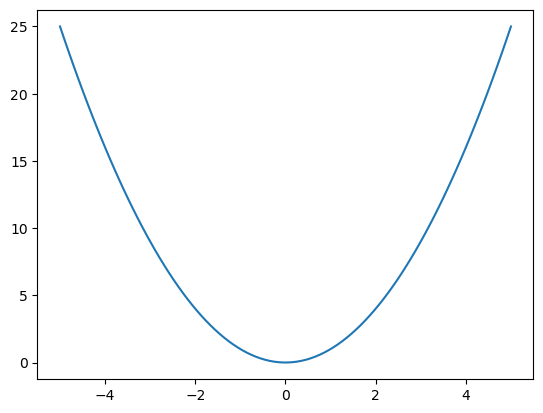

In [21]:
#create data points
x = np.linspace(-5,5,100) #100 data points between -5 and 5

# define function
def f(x):
    return x**2

#f = lambda x : x**2

#plot function
plt.plot(x, f(x)) 
plt.show()

*pro tip:* easy functions can (and should) be defined using the reserved word 'lambda':
> name_for_function = lambda [variable names] : code that should be executed

eg.

    f = lambda x : x**2

is equivalent to the definition above but can be written in one line

### Layout ###

#### Labels and title ####

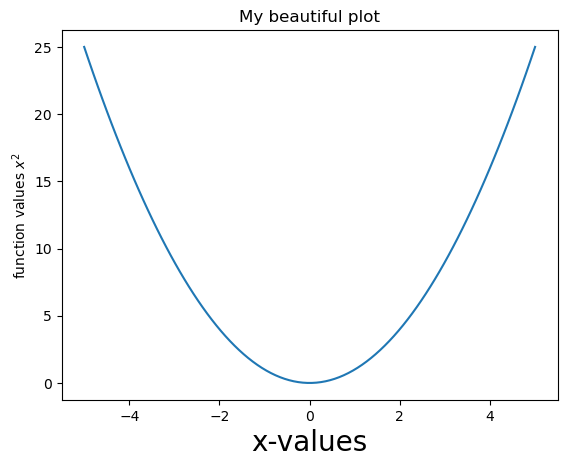

In [22]:
plt.plot(x,f(x))

#you can add labels to the axes using these commands
plt.xlabel('x-values', fontsize=20)
plt.ylabel('function values $x^2$') #default fontsize is 10

#you can add a title
plt.title('My beautiful plot')

plt.show()

#### change font size of ticks ####

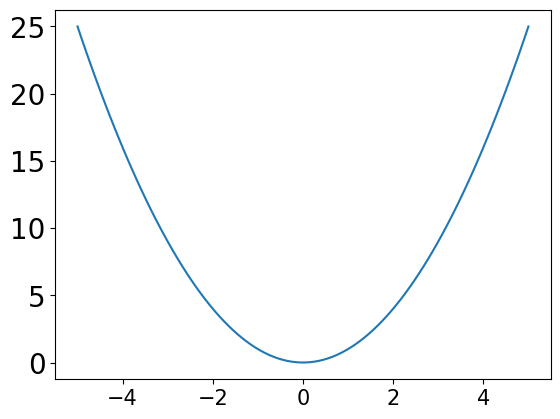

In [23]:
plt.plot(x,f(x))

#change font size of ticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)

plt.show()

#### legend ####

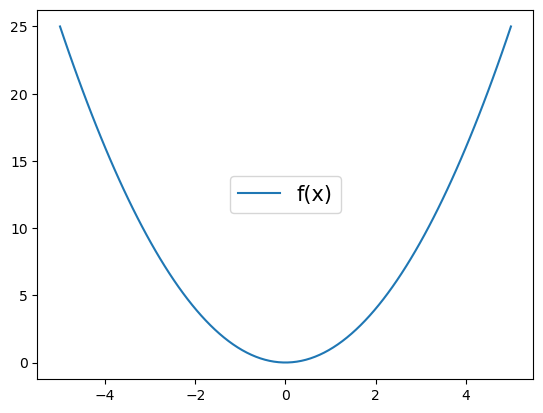

In [24]:
#add a label to the function
plt.plot(x,f(x), label='f(x)')

#and show a legend
plt.legend(loc=10, fontsize=15)

plt.show()

###### location parameters ######
*loc* is the location parameter and stands for following positions:

[0: best, 1: upper right, 2: upper left, 3: lower left, 4: lower right, 5: right,
    6: center left, 7: center right, 8: lower center, 9: upper center, 10: center]

#### including colors and styles ####

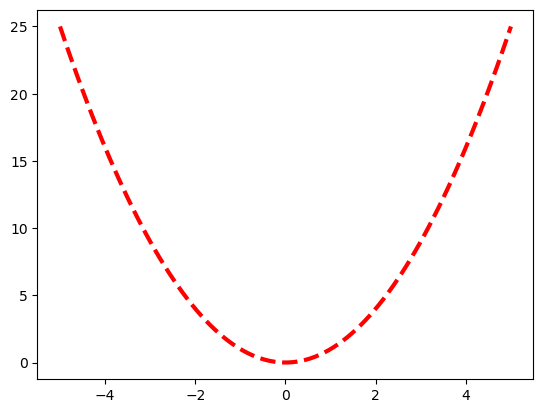

In [25]:
#different keywords can be included to change the style

#plt.plot(x,f(x),color='green', marker='*', markeredgecolor='coral', markersize=15)

#basic colors and linestyles/markers can also be specified together:
plt.plot(x, f(x), 'r--', lw=3)

plt.show()

##### style keywords #####

color (or c) : 'r(ed)', 'g(reen)', 'b(lue)', 'k' (black), 'coral', 'navy', 'mediumsteelblue', ... 
        [see: https://matplotlib.org/3.1.0/gallery/color/named_colors.html]
        
linestyle (or ls) : '--', '-', '-.', ':', ...

linewidth (or lw) : float 

marker : 'x', 'o', '.', 'P', '*', '^', ...

markeredgecolor (or mec) : color

markerfacecolor (or mfc) : color

markeredgewidth (or mew) : float

markersize (or ms) : float


### Example: Multiple functions ###
Often you need to plot multiple things in one plot, this is shown below.

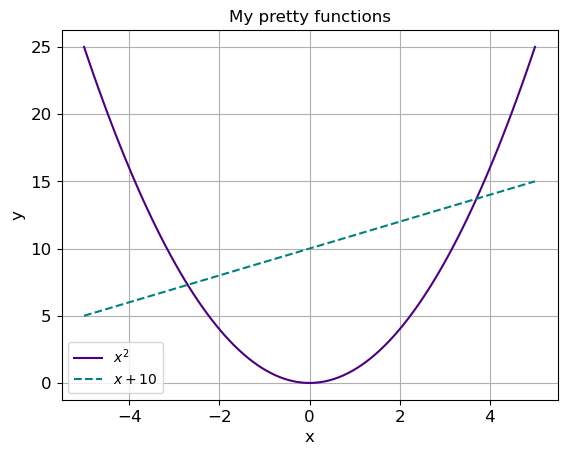

In [26]:
# define functions
def f(x): 
    return x**2
def g(x): 
    return x + 10

#plot function
plt.plot(x, f(x), c='indigo', label=r'$x^2$')
plt.plot(x, g(x), c='teal', ls='--', label=r'$x + 10$')

plt.title('My pretty functions',fontsize=12)

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc=3)

plt.grid() #includes grid

plt.show()

### Example: Derivative of function ###

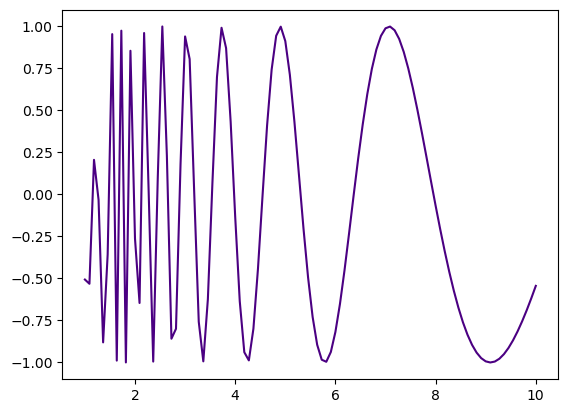

In [27]:
#define range
x0 = np.linspace(1,10,100)

#define function
def h(x):
    return np.sin(100/x)

#plot function
plt.plot(x0, h(x0), c='indigo', label='h(x)')
plt.show()

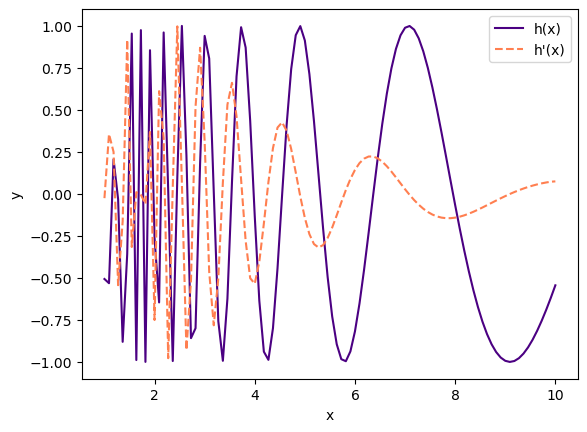

In [28]:
#calculate derivative with numpy
h_derivative = np.gradient(h(x0)) 

#create plots
plt.plot(x0, h(x0), c='indigo', label='h(x)')
plt.plot(x0,h_derivative, c='coral', label="h'(x)", ls='--')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

### multiple plots next to each other

Instead of plotting the functions on top of each other it can be useful to have seperate plots in one figure.

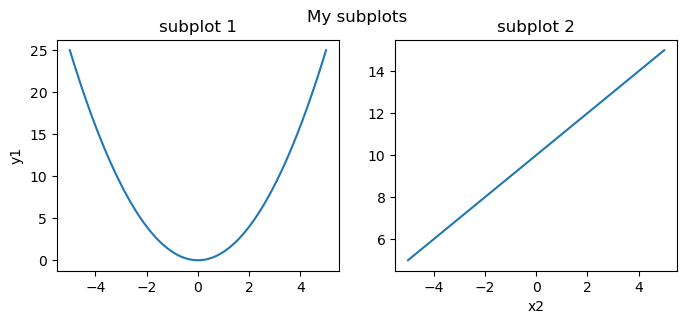

In [29]:
#create subplots
fig,axs = plt.subplots(1,2,figsize=(8,3)) #number of rows, number of columns, size
#axs is a tuple of the two subplot axis

axs[0].plot(x,f(x))
axs[0].set_title('subplot 1')
axs[0].set_ylabel('y1')

axs[1].plot(x,g(x))
axs[1].set_title('subplot 2')
axs[1].set_xlabel('x2')

fig.suptitle('My subplots') #create title for both plots

plt.show()

## Plotting data ##

There are many different ways of plotting data, here we discuss only a few of them.

### Bar Graph ###

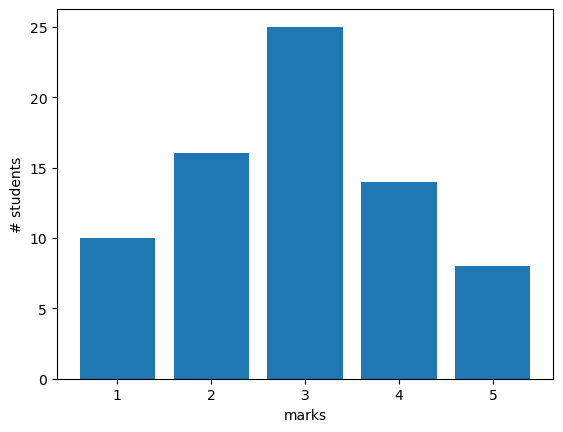

In [30]:
marks = ['1','2','3','4','5']
students = [10,16,25,14,8]

#plot a bar diagram
plt.bar(marks,students) #again there are many options [https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html]

plt.xlabel('marks')
plt.ylabel('# students')

plt.show()

### Histogram ###

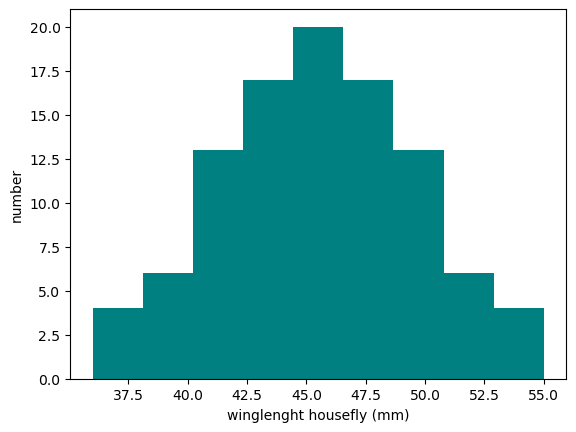

In [31]:
#load data from housefly.txt [winglength of housefly from https://seattlecentral.edu/qelp/sets/057/057.html]
#original data from: Sokal, R.R. and P.E. Hunter. 1955. A morphometric analysis of DDT-resistant and non-resistant housefly strains Ann. Entomol. Soc. Amer. 48: 499-507.

data = np.loadtxt('data/housefly.txt')
plt.hist(data, bins='auto',color='teal')   #bins: number of equal-width bins (if int), or bin edge (if sequence)
                                                        #density: data is normalized
                                                        #many other options: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
plt.xlabel('winglenght housefly (mm)')
plt.ylabel('number')
plt.show()

### Scatter Plot ###

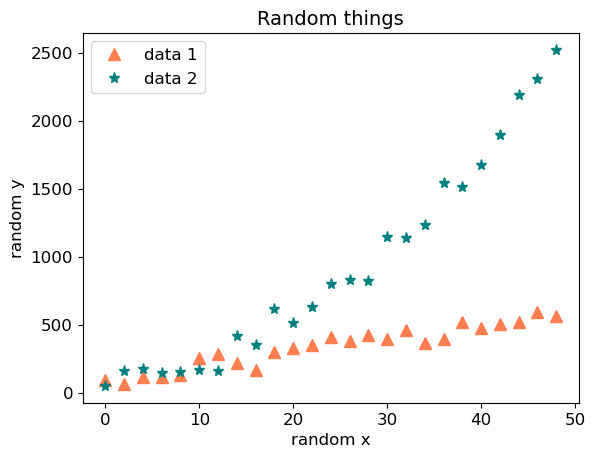

In [34]:
#create data with some noise
np.random.seed(300)

x1 = np.arange(0.0,50.0,2.0)
y = 10*x1 + np.random.rand(len(x1))*200
z = x1**2 + np.random.rand(len(x1))*300

#scatter plots
plt.plot(x1, y, marker='^', ls='', color='coral', markersize=8, label='data 1') 
plt.plot(x1, z, marker='*', ls='', color='teal', markersize=8,label='data 2') 

plt.xlabel('random x', fontsize=12)
plt.ylabel('random y', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('Random things', fontsize=14)

plt.legend(fontsize=12)

plt.savefig('simple_plot.png', dpi=300)

plt.show()